In [2]:
# data source = engine data 


# !pip install pandas numpy matplotlib seaborn scikit-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import datetime
import time
import random




In [3]:
df = pd.read_csv('engine_data.csv')

In [4]:
df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


###  Info about data 
- Enigine rpm 
- lubricant oil temperature
- coolant temperature
- coolant pressure
- lubricant oil pressure
- fuel pressure
- engine condition 1/0

In [5]:
df.describe().round(3)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000,19535.000,19535.000,19535.000,19535.000,19535.000,19535.000
mean,791.239,3.304,6.656,2.335,77.643,78.427,0.631
std,267.611,1.022,2.761,1.036,3.111,6.207,0.483
min,61.000,0.003,0.003,0.002,71.322,61.673,0.000
25%,593.000,2.519,4.917,1.600,75.726,73.895,0.000
50%,746.000,3.162,6.202,2.167,76.817,78.347,1.000
75%,934.000,4.055,7.745,2.849,78.072,82.915,1.000
max,2239.000,7.266,21.138,7.479,89.581,195.528,1.000


In [6]:
df.isna().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [8]:
df['Engine Condition'].value_counts()
# "0" Engine in a normal or healthy condition
# "1" Engine in a faulty or problematic condition

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

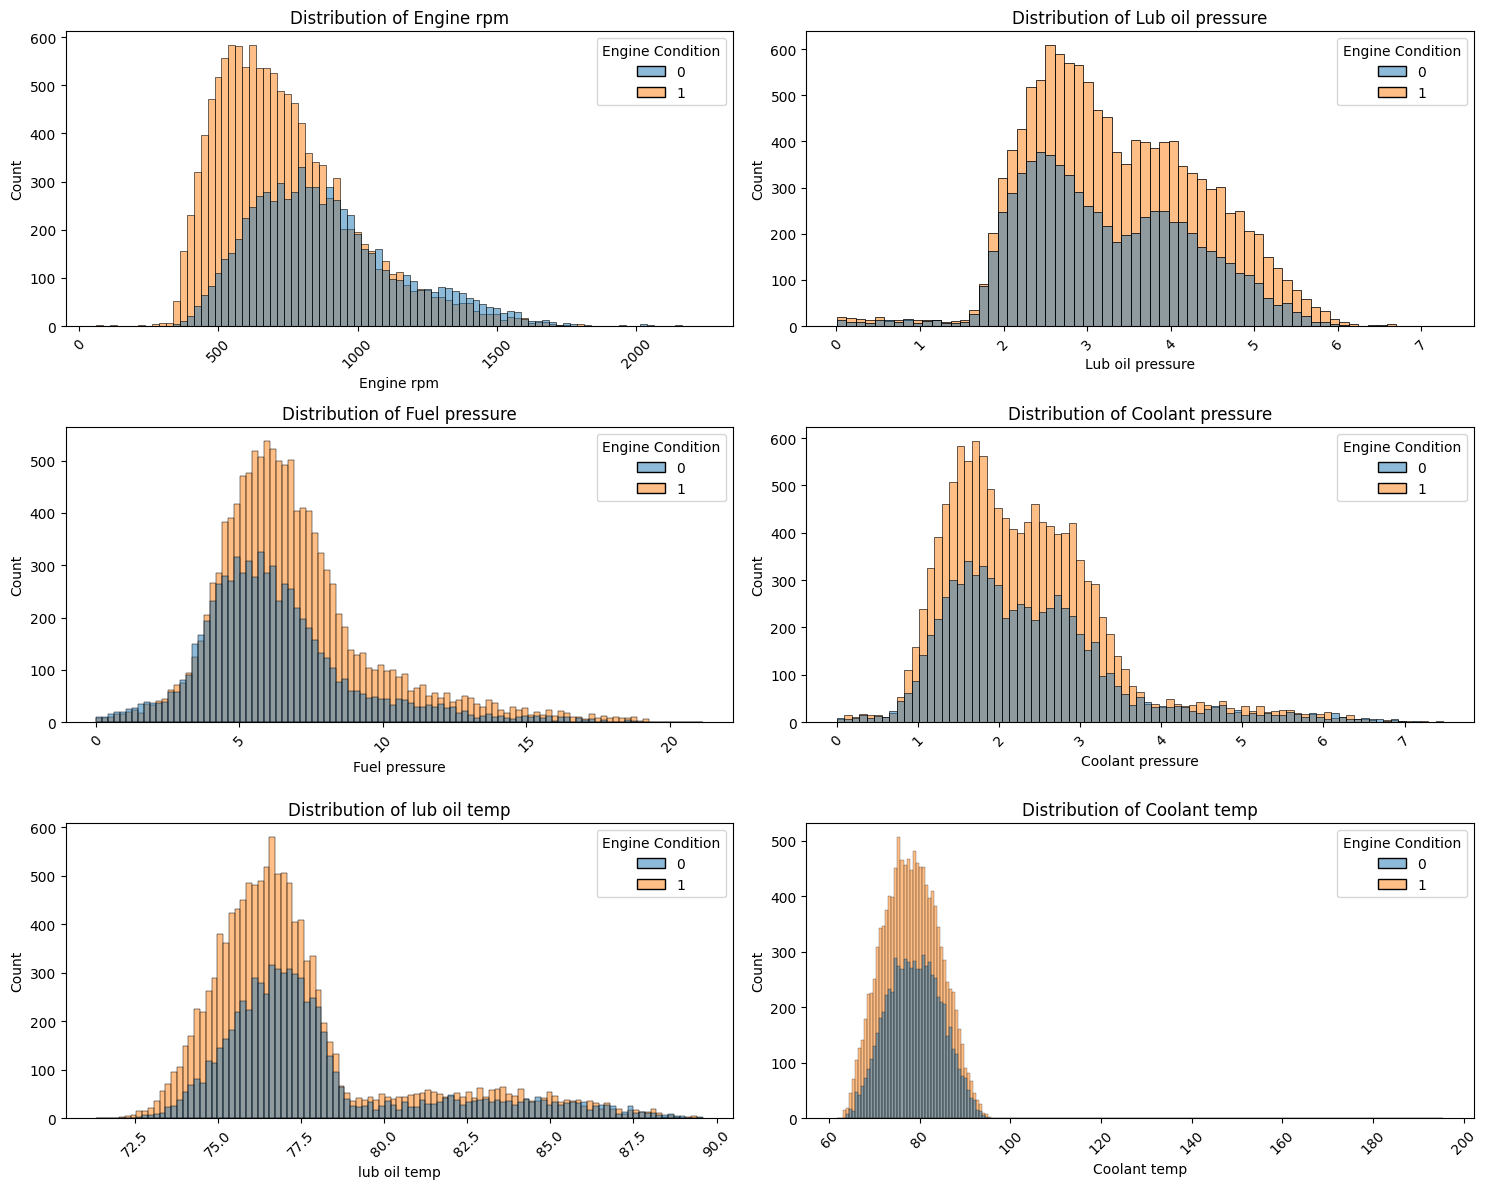

In [9]:
# Original feature names
features = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 
           'Coolant pressure', 'lub oil temp', 'Coolant temp']

# 1. Enhanced Distribution Analysis
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='Engine Condition', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



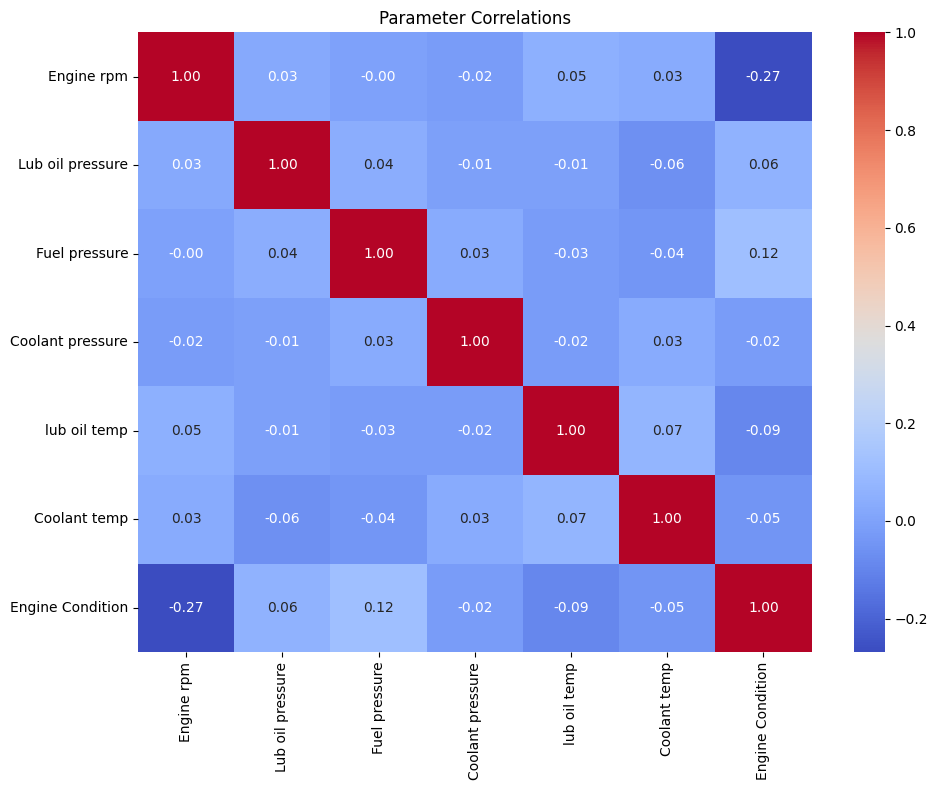

In [10]:
# 2. Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ['Engine Condition']].corr(), 
            annot=True, 
            fmt='.2f',
            cmap='coolwarm')
plt.title('Parameter Correlations')
plt.tight_layout()
plt.show()



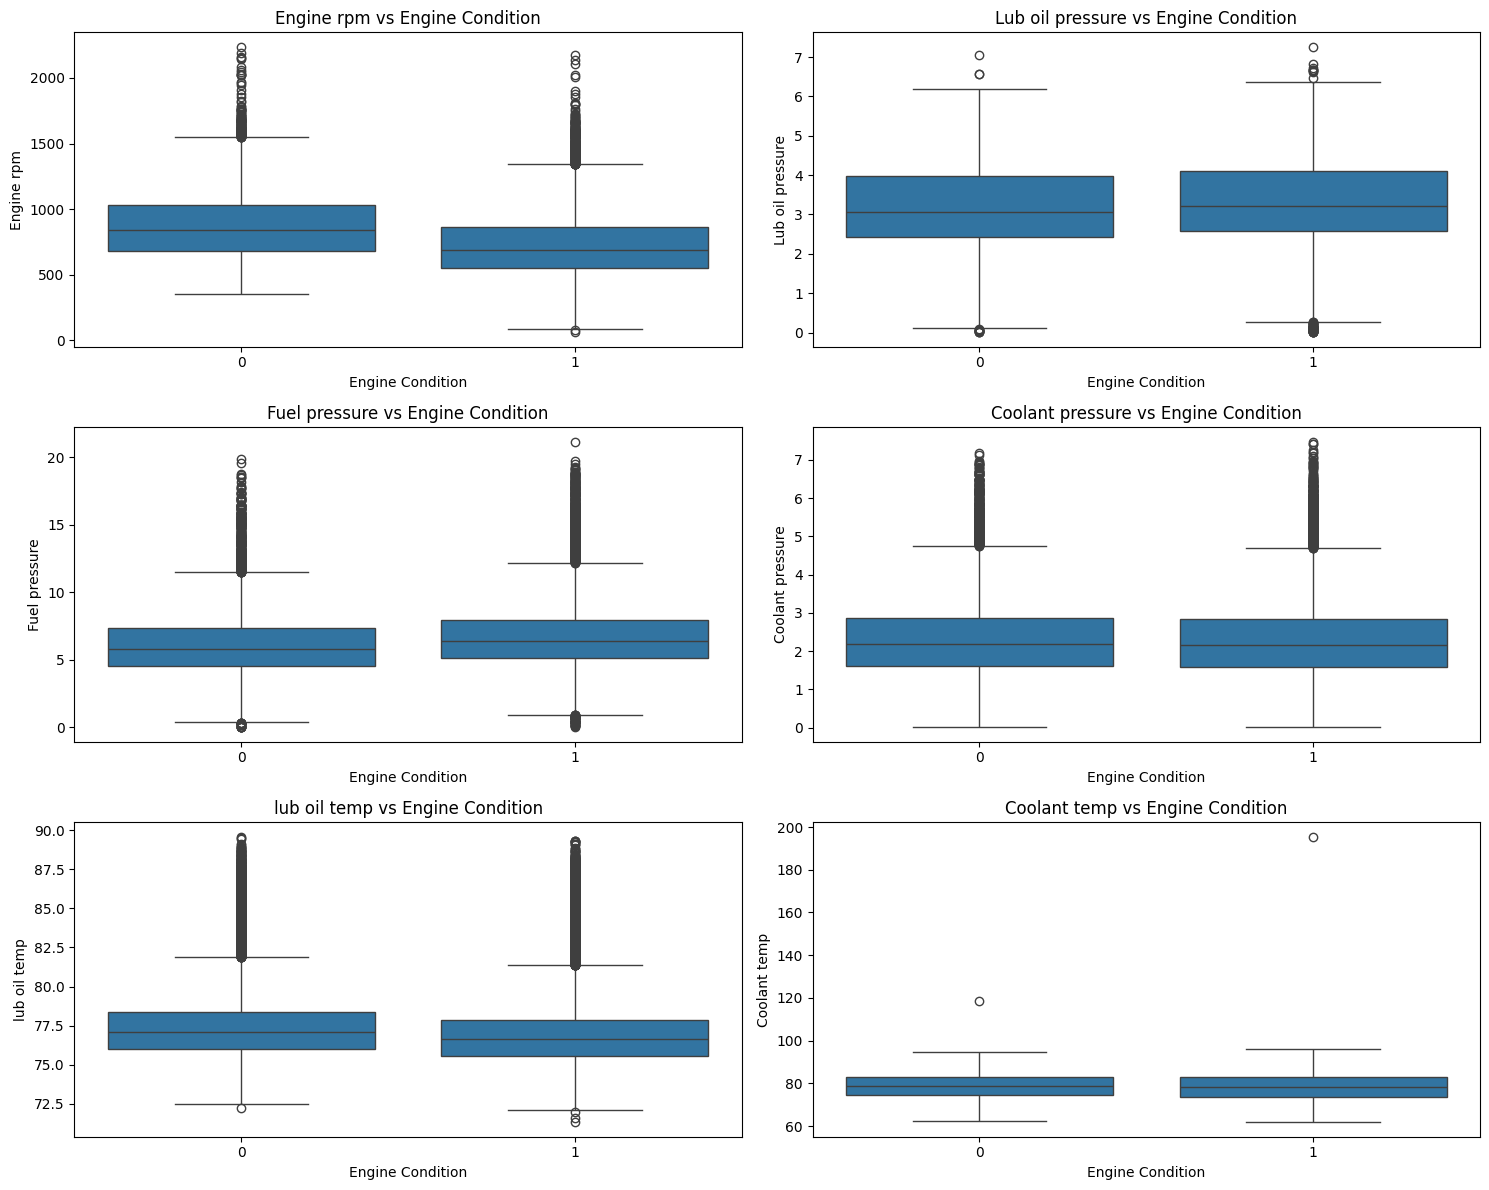

In [11]:
# 3. Parameter Relationships by Engine Condition
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
for i, feature in enumerate(features):
    sns.boxplot(data=df, x='Engine Condition', y=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Engine Condition')
plt.tight_layout()
plt.show()



In [12]:
# 4. Statistical Summary
print("\nStatistical Summary by Engine Condition:")
print(df.groupby('Engine Condition')[features].describe())




Statistical Summary by Engine Condition:
                 Engine rpm                                               \
                      count        mean         std    min    25%    50%   
Engine Condition                                                           
0                    7218.0  884.995012  271.722814  351.0  685.0  843.0   
1                   12317.0  736.296582  249.302159   61.0  552.0  690.0   

                                 Lub oil pressure            ... lub oil temp  \
                     75%     max            count      mean  ...          75%   
Engine Condition                                             ...                
0                 1031.0  2239.0           7218.0  3.222497  ...    78.370924   
1                  868.0  2172.0          12317.0  3.351406  ...    77.890560   

                            Coolant temp                                  \
                        max        count       mean       std        min   
Engine Condition   

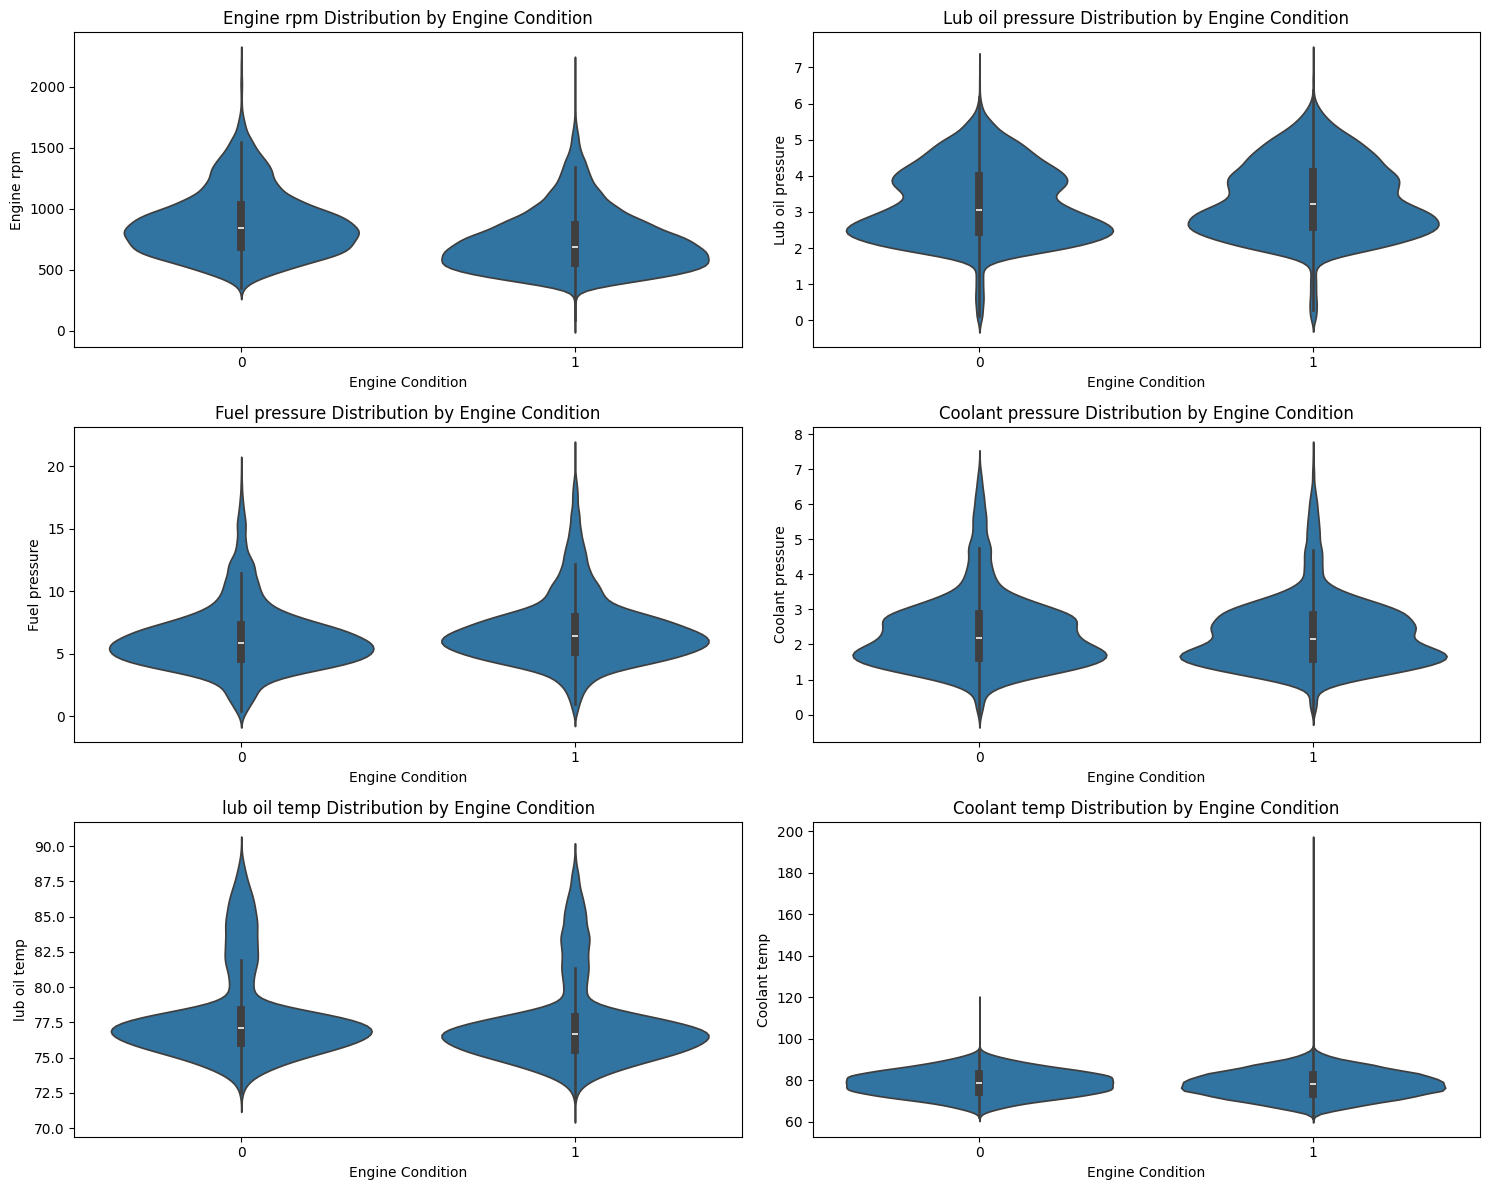

In [13]:
# 5. Violin Plots for Detailed Distribution
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
for i, feature in enumerate(features):
    sns.violinplot(data=df, x='Engine Condition', y=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} Distribution by Engine Condition')
plt.tight_layout()
plt.show()

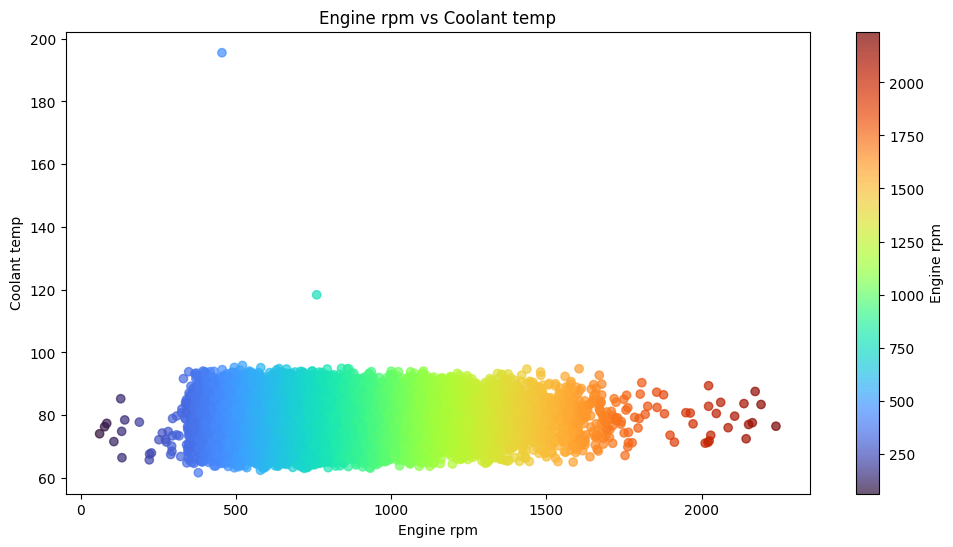

In [14]:
plt.figure(figsize =(12, 6))
scatter = plt.scatter(
    df["Engine rpm"],
    df["Coolant temp"],
    c = df["Engine rpm"],
    cmap = 'turbo',
    alpha = 0.7
)
plt.colorbar(scatter, label = 'Engine rpm')
plt.title("Engine rpm vs Coolant temp")
plt.xlabel("Engine rpm")
plt.ylabel("Coolant temp")
plt.show()

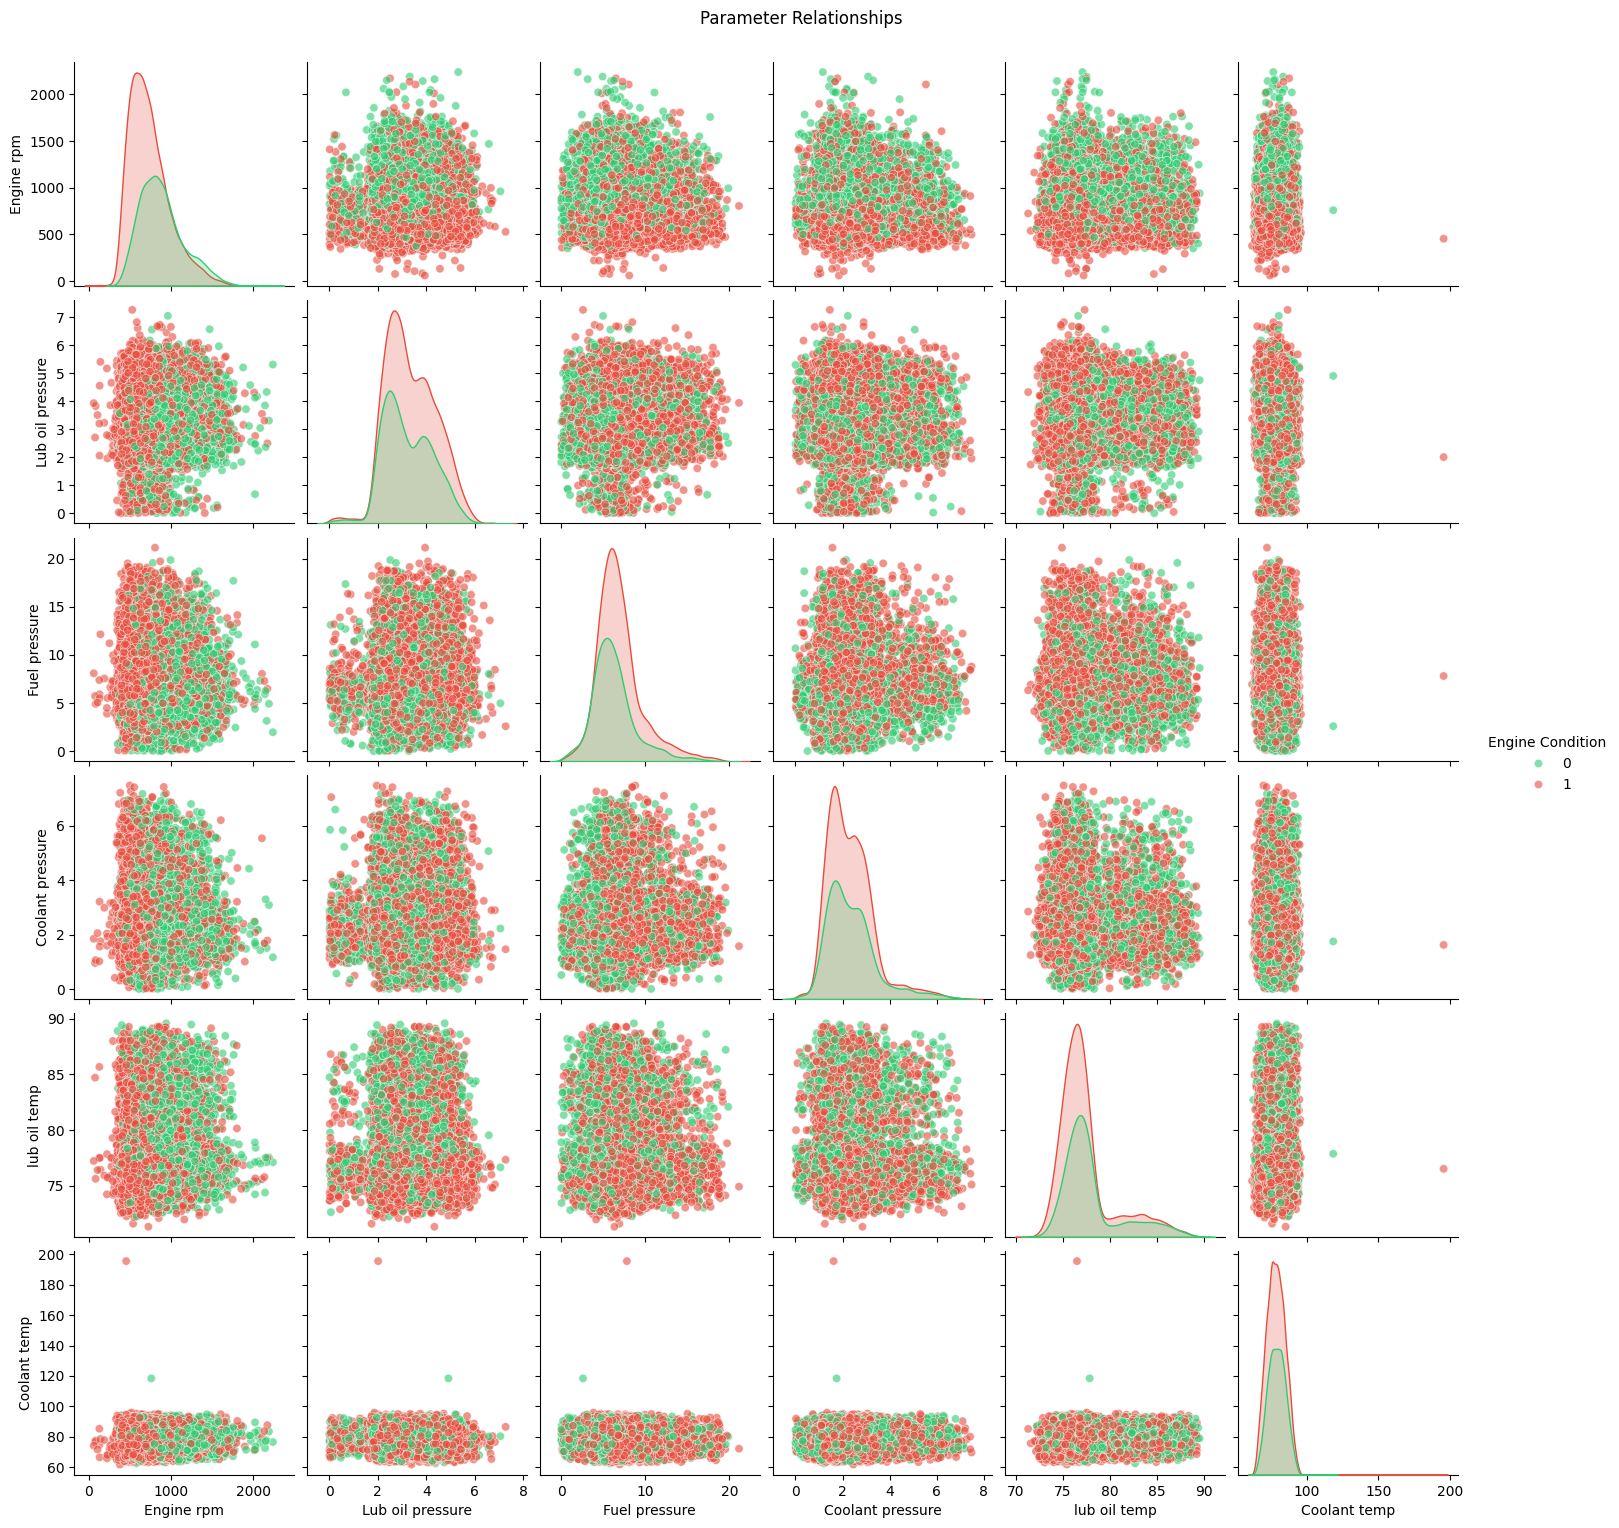

In [15]:
# Pair Plot
sns.set_palette(['#2ecc71', '#e74c3c'])
pair_plot = sns.pairplot(
    df,
    hue='Engine Condition',
    vars=features,
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
pair_plot.fig.suptitle('Parameter Relationships', y=1.02)
plt.show()

In [16]:
df_temp = df.drop(columns=["Engine Condition"])
df_temp


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,700,2.493592,11.790927,3.178981,84.144163,81.632187
1,876,2.941606,16.193866,2.464504,77.640934,82.445724
2,520,2.961746,6.553147,1.064347,77.752266,79.645777
3,473,3.707835,19.510172,3.727455,74.129907,71.774629
4,619,5.672919,15.738871,2.052251,78.396989,87.000225
...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396


In [17]:
Q1 = df_temp[['Engine rpm', 'Coolant temp']].quantile(0.25)
print(Q1)
print("-------------------------------")
Q3 = df_temp[['Engine rpm', 'Coolant temp']].quantile(0.75)
print(Q3)

Engine rpm      593.000000
Coolant temp     73.895421
Name: 0.25, dtype: float64
-------------------------------
Engine rpm      934.000000
Coolant temp     82.915411
Name: 0.75, dtype: float64


In [18]:
IQR = Q3 - Q1
print(IQR)

Engine rpm      341.00000
Coolant temp      9.01999
dtype: float64


In [19]:
lower_limit = Q1 - 1.5*IQR
print(lower_limit)
print("-------------------------------")
upper_limit = Q3 + 1.5*IQR
print(upper_limit)

Engine rpm      81.500000
Coolant temp    60.365435
dtype: float64
-------------------------------
Engine rpm      1445.500000
Coolant temp      96.445397
dtype: float64


In [20]:
outlier_mask = (df[['Engine rpm', 'Coolant temp']] < lower_limit) | (df[['Engine rpm', 'Coolant temp']] > upper_limit)
outliers = df[outlier_mask.any(axis=1)] 
outliers

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
55,1674,2.501620,3.624157,2.043075,76.772327,74.641940,0
88,1776,3.648060,5.873874,1.318790,76.481421,71.233786,0
102,1481,3.972600,5.701680,1.556111,75.997690,93.791609,0
108,1661,3.518121,11.802902,2.951991,76.725921,72.872725,0
143,1620,1.536989,6.398304,2.423895,75.163334,77.340058,0
...,...,...,...,...,...,...,...
19241,2136,3.311171,7.282090,1.678657,75.783308,83.707670,1
19357,1556,4.786442,7.678463,4.029723,78.774495,71.273450,0
19409,1586,5.044422,8.794704,2.523254,77.276628,70.349750,1
19447,1807,3.727537,14.140429,4.446769,77.008190,90.369222,1


In [21]:
percentage = (466/19535)*100
print("Data loss due to outlier :", percentage)

Data loss due to outlier : 2.385461991297671


In [22]:
df_cleaned = df[~outlier_mask.any(axis=1)]
df_cleaned

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [23]:
df_cleaned.round(3)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.494,11.791,3.179,84.144,81.632,1
1,876,2.942,16.194,2.465,77.641,82.446,0
2,520,2.962,6.553,1.064,77.752,79.646,1
3,473,3.708,19.510,3.727,74.130,71.775,1
4,619,5.673,15.739,2.052,78.397,87.000,0
...,...,...,...,...,...,...,...
19530,902,4.117,4.981,4.347,75.952,87.925,1
19531,694,4.818,10.867,6.187,75.281,74.928,1
19532,684,2.673,4.927,1.904,76.845,86.337,1
19533,696,3.094,8.292,1.222,77.180,73.624,1


In [24]:
X = df_cleaned.drop(columns=["Engine Condition"])
Y = df_cleaned['Engine Condition']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)    


knn = KNeighborsClassifier(
    n_neighbors = 25
)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=25)

In [26]:
Y_pred = knn.predict(x_test)


In [27]:
Knn_accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy KNN: {Knn_accuracy*100}")

Accuracy KNN: 65.5742003146303


In [28]:
print("Classification Report:")
print(classification_report(y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.35      0.42      1358
           1       0.70      0.82      0.75      2456

    accuracy                           0.66      3814
   macro avg       0.61      0.59      0.59      3814
weighted avg       0.64      0.66      0.64      3814



In [29]:
# # hyper parameter tuning for knn    
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_neighbors': [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'chebyshev']
# }

# grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 1, cv = 5, n_jobs = -1)

# grid.fit(X_train, Y_train)

# print(grid.best_params_)



In [30]:
param = {'metric': 'euclidean', 'n_neighbors': 60, 'weights': 'distance'}

# Y_pred = grid.predict(x_test)

In [31]:
# Accuracy
Knn_accuracy = accuracy_score(y_test, Y_pred)


In [32]:
Knn_accuracy

0.655742003146303

In [33]:
from sklearn.svm import SVC

svm = SVC(
    kernel ="linear",
    C = 1.0,
    degree = 3, 
    gamma = "scale"
)
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [34]:
y_pred = svm.predict(x_test)


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVM:", svm_accuracy*100)

Accuracy SVM: 66.57052962768746


In [36]:
# # hyper parameter tuning for SVM
# param_grid = {
#     'C': [0.1, 1, 10, 100],
    
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }

# grid = GridSearchCV(SVC(), param_grid, verbose = 1, cv = 5, n_jobs = -1)

# grid.fit(X_train, Y_train)

# print(grid.best_params_)



In [37]:
# best parameters = {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

# y_pred=grid.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)

In [39]:
accuracy

0.6657052962768747

In [40]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(
    n_estimators = 100, 
    random_state = 42
)
rdf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [41]:
Rfy_pred = rdf.predict(x_test)


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rdf_accuracy = accuracy_score(Rfy_pred, y_test)
print("Accuracy RandomForest: ", rdf_accuracy*100)

Accuracy RandomForest:  65.52176192973256


In [43]:
# # hyper parameter tuning for Random Forest

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [10, 20, 30, 40, 50],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose = 1, cv = 5, n_jobs = 4)

# grid.fit(X_train, Y_train)


# print(grid.best_params_)

In [44]:
# best param = {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 400}
 


# grid.best_score_

In [45]:
# !pip install xgboost


In [46]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators = 100, 
    random_state = 42, 
    use_label_encoder=False, 
    eval_metric = 'logloss' 
)
xgb.fit(X_train, Y_train)

f:\ds cp\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [10:47:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [47]:
xgbY_pred = xgb.predict(x_test)


In [48]:

xgb_accuracy = accuracy_score(xgbY_pred, y_test)
print("Accuracy XGBoost :",xgb_accuracy*100)

Accuracy XGBoost : 65.04981646565285


In [49]:
# # hyper parameter tuning for XGBoost
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, 50],
#     'learning_rate': [0.1, 0.01, 0.001, 0.0001]
# }

# grid = GridSearchCV(XGBClassifier(), param_grid, verbose = 3, cv = 5, n_jobs = 4)

# grid.fit(X_train, Y_train)

# print(grid.best_params_)

In [50]:
# y_pred = grid.predict(x_test)

# # best param = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

# accuracy = accuracy_score(y_test, y_pred)

In [51]:
accuracy


0.6657052962768747

In [52]:
# ensemble model with the best scores from each model
from sklearn.ensemble import VotingClassifier
# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('rdf', rdf),
        ('xgb', xgb)
    ],
    voting='hard'
)

# Fit the ensemble model
ensemble_model.fit(X_train, Y_train)


# Predict using the ensemble model
ensemble_pred = ensemble_model.predict(x_test)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Model Accuracy: {ensemble_accuracy * 100:.2f}%")


f:\ds cp\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [10:47:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 66.10%


In [53]:
# best param for knn = {'metric': 'euclidean', 'n_neighbors': 60, 'weights': 'distance'}
# best param for SVM = {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
# best param for Random Forest = {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 400}
# best param for XGBoost = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

# best param for ensemble model = {'knn': {'metric': 'euclidean', 'n_neighbors': 60, 'weights': 'distance'}, 'svm': {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}, 'rdf': {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 400}, 'xgb': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}}

#trainig the model with the best parameters
knn = KNeighborsClassifier(
    n_neighbors = 60,
    metric = 'euclidean',
    weights = 'distance'
)

svm = SVC(
    C = 1,
    gamma = 'auto',
    kernel = 'rbf'
)

rdf = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 10,
    max_features = 'log2',
    n_estimators = 400
)

xgb = XGBClassifier(
    learning_rate = 0.1,
    max_depth = 10,
    n_estimators = 100
)

ensemble_model = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('rdf', rdf),
        ('xgb', xgb)
    ],
    voting='hard'
)

ensemble_model.fit(X_train, Y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=60,
                                                   weights='distance')),
                             ('svm', SVC(C=1, gamma='auto')),
                             ('rdf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=400)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [54]:
ensemble_pred = ensemble_model.predict(x_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_pred)



In [55]:
ensemble_accuracy

0.670162558993183

In [56]:
# !pip install imbalanced-learn


from imblearn.over_sampling import SMOTE


x = df_cleaned.drop(columns=["Engine Condition"])
y = df_cleaned['Engine Condition']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x,y)  # X: features, y: target


In [57]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [58]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)

f:\ds cp\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
accuracy


0.6464982269503546

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [62]:
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [63]:
accuracy

0.7085549645390071

In [64]:
ensemble_model = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('rdf', rdf),
        ('xgb', xgb)
    ],
    voting='hard'
)

ensemble_model.fit(X_train, y_train)



VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=60,
                                                   weights='distance')),
                             ('svm', SVC(C=1, gamma='auto')),
                             ('rdf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=400)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [65]:
ensemble_pred = ensemble_model.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

ensemble_accuracy

0.7103280141843972

In [66]:
# classification report
print(classification_report(y_test, ensemble_pred))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      2198
           1       0.80      0.59      0.67      2314

    accuracy                           0.71      4512
   macro avg       0.73      0.71      0.71      4512
weighted avg       0.73      0.71      0.71      4512

